In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
# 데이터를 벡터로 변환
import numpy as np

def vectorize_sequences(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.  # 특정 인덱스의 위치를 1.으로 만듦
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
# 레이블을 벡터로 변환 - One Hot Encoding
def to_one_hot(labels, dim=46):
  results = np.zeros((len(labels), dim))
  for i, l in enumerate(labels):
    results[i,l] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [4]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(46, activation='softmax'))
# 출력 46

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
                metrics=['accuracy'])

In [18]:
# 훈련 검증
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
# 20번의 에포크 동안 훈련시킴
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
                    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 80ms/step - loss: 2.3091 - accuracy: 0.5259 - val_loss: 1.4605 - val_accuracy: 0.6580
Epoch 2/20
16/16 [==============================] - 1s 80ms/step - loss: 1.2120 - accuracy: 0.7175 - val_loss: 1.1435 - val_accuracy: 0.7500
Epoch 3/20
16/16 [==============================] - 1s 76ms/step - loss: 0.8461 - accuracy: 0.8143 - val_loss: 1.0405 - val_accuracy: 0.7740
Epoch 4/20
16/16 [==============================] - 1s 74ms/step - loss: 0.6335 - accuracy: 0.8599 - val_loss: 0.9288 - val_accuracy: 0.8120
Epoch 5/20
16/16 [==============================] - 1s 79ms/step - loss: 0.4547 - accuracy: 0.9035 - val_loss: 0.9915 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 1s 73ms/step - loss: 0.3357 - accuracy: 0.9270 - val_loss: 1.3410 - val_accuracy: 0.7270
Epoch 7/20
16/16 [==============================] - 1s 79ms/step - loss: 0.2747 - accuracy: 0.9382 - val_loss: 0.9299 - val_accuracy: 0.8190
Epoch 8/20
16

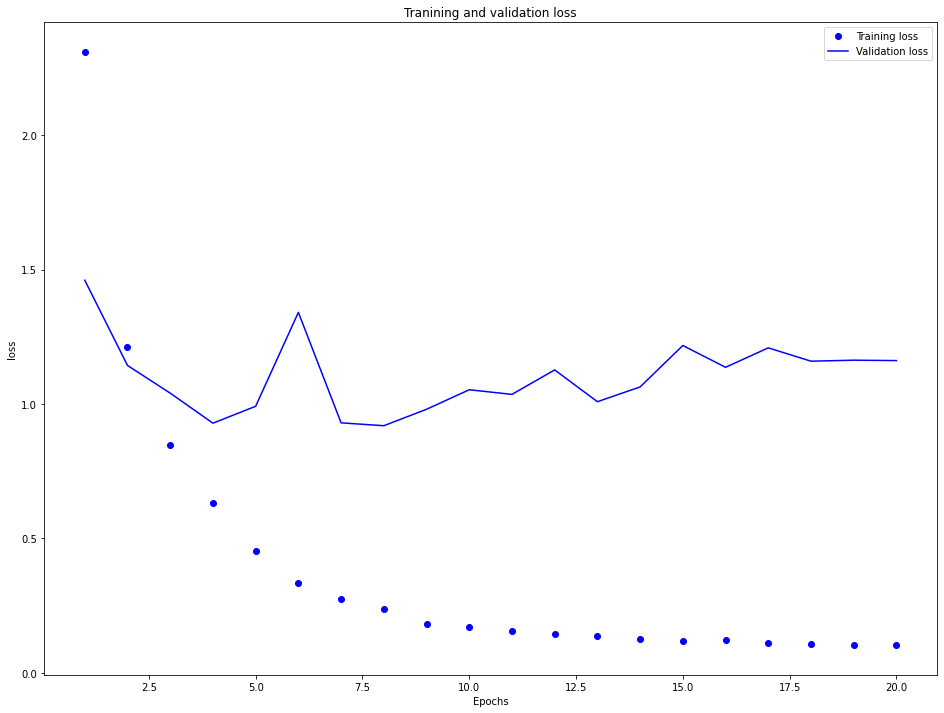

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize=(16,12))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Tranining and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

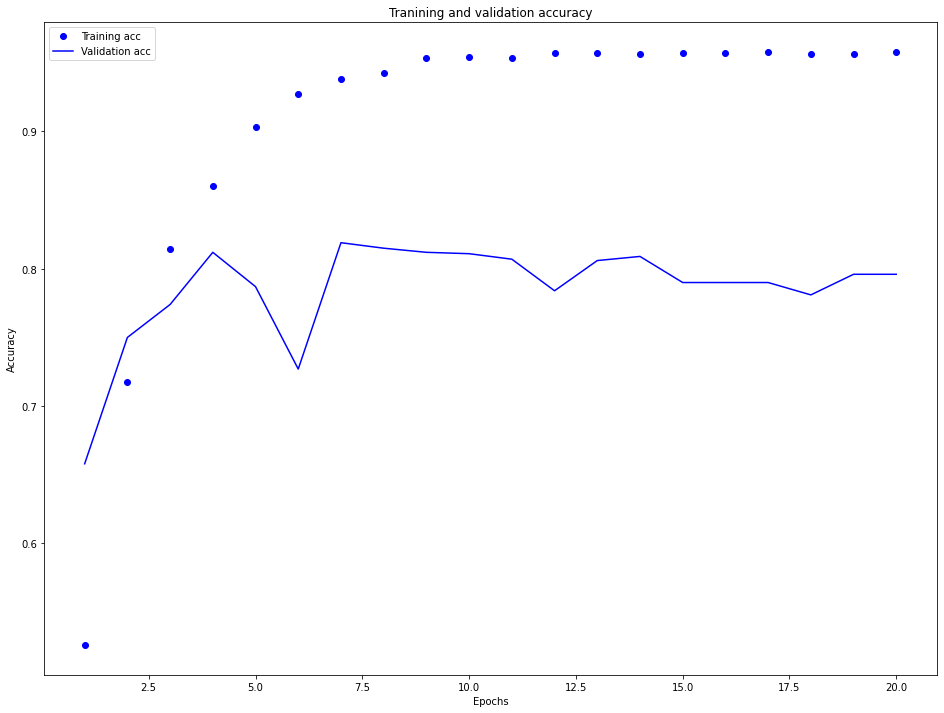

In [21]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(16,12))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Tranining and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# 9번째 에포크에서 과대적합 -> 9번의 에포크로 새로운 훈련
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 44ms/step - loss: 2.5027 - accuracy: 0.4613
Epoch 2/9
16/16 [==============================] - 1s 50ms/step - loss: 1.4200 - accuracy: 0.6964
Epoch 3/9
16/16 [==============================] - 1s 49ms/step - loss: 1.0723 - accuracy: 0.7707
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.8453 - accuracy: 0.8196
Epoch 5/9
16/16 [==============================] - 1s 44ms/step - loss: 0.6719 - accuracy: 0.8588
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.5395 - accuracy: 0.8884
Epoch 7/9
16/16 [==============================] - 1s 50ms/step - loss: 0.4369 - accuracy: 0.9112
Epoch 8/9
16/16 [==============================] - 1s 42ms/step - loss: 0.3529 - accuracy: 0.9252
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9751 - accuracy: 0.7885
[0.9750642776489258, 0.7885128855705261]


In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

0.99999994

In [26]:
np.argmax(predictions[0])

3